### 구글드라이브를 마운트해서 구글드라이브와 연결함.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


## kaggle을 colab환경에 설치하기

In [2]:
!pip install kaggle

## 폴더를 만들고 구글드라이브에 있는 kaggle.json파일을 새로 만든 폴더에 옮긴다.


In [3]:
!mkdir -p ~/.kaggle
!cp /content/drive/'My Drive'/kaggle/kaggle.json ~/.kaggle/

## Permission Warning이 일어나지 않도록 권한 조정하기
## 참가한 모든 대회 보기

In [4]:
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions list

ref                                               deadline             category            reward  teamCount  userHasEntered  
------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
tpu-getting-started                               2030-06-03 23:59:00  Getting Started      Kudos         31           False  
digit-recognizer                                  2030-01-01 00:00:00  Getting Started  Knowledge       3361           False  
titanic                                           2030-01-01 00:00:00  Getting Started  Knowledge      25530            True  
house-prices-advanced-regression-techniques       2030-01-01 00:00:00  Getting Started  Knowledge       5731           False  
connectx                                          2030-01-01 00:00:00  Getting Started  Knowledge        555           False  
nlp-getting-started                               2030-01-01 00:00:00  Getting Started      Kudos       1809   

## 캐글에서 타이타닉 데이터를 다운로드 받기

In [5]:
!kaggle competitions download -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 44.7MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 62.1MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.10MB/s]


##데이터셋이 제대로 불러와졌는지 확인하기

In [6]:
!ls

drive  gender_submission.csv  sample_data  test.csv  train.csv


## 관련 라이브러리들 불러오기

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 데이터 먼저 확인하기


In [10]:
file_path = '/content/train.csv'

train_data = pd.read_csv(file_path)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 확인한 데이터 백업하고 제대로 백업이 되어있는지 확인



In [11]:
titanic_backup = train_data.copy()

titanic_backup.to_csv('/content/titanic_backup.csv')
!ls

file_path = '/content/titanic_backup.csv'
check_data = pd.read_csv(file_path)
print(check_data)

drive		       sample_data  titanic_backup.csv
gender_submission.csv  test.csv     train.csv
     Unnamed: 0  PassengerId  Survived  ...     Fare Cabin Embarked
0             0            1         0  ...   7.2500   NaN        S
1             1            2         1  ...  71.2833   C85        C
2             2            3         1  ...   7.9250   NaN        S
3             3            4         1  ...  53.1000  C123        S
4             4            5         0  ...   8.0500   NaN        S
..          ...          ...       ...  ...      ...   ...      ...
886         886          887         0  ...  13.0000   NaN        S
887         887          888         1  ...  30.0000   B42        S
888         888          889         0  ...  23.4500   NaN        S
889         889          890         1  ...  30.0000  C148        C
890         890          891         0  ...   7.7500   NaN        Q

[891 rows x 13 columns]


## 데이터 확인하기

In [12]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


데이터를 확인해보니 Column은 11개가 있고, 데이터는 891개가 있는데 Age와 Cabin, Embarked에는 결측치가 있는 것 같다. 

## 데이터의 타입을 파악하고 연속형 데이터와 범주형 데이터로 나눠보려고 한다.

In [16]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


데이터 타입을 파악해보니 Passengerld은 index인 것 같고 Survived, Pclass, Sex, Embarked은 범주형 데이터인 것 같고, Age, Fare은 연속형 데이터인 것 같다. 그리고 Sibsp, Parch는 지금 단적으로 보기에는 연속형 인것 같지만 자세히 살펴보고 연속형인지 범주형인지 판단을 내려야 할 것 같다. Name, Ticket, Cabin은 아마 연속형도 범주형도 아닌 데이터 인 것 같다. 이 Column들은 따로 기계학습을 하는데는 필요하지 않을 것 같다는 판단을 했다. 

## 데이터들을 연속형과 범주형으로 나눴으니, 이제 데이터 클린징을 하여 결측치들을 제거하거나 대체한다.

#### 먼저 데이터의 결측치가 있는 것들을 확인하고 시각화하여 나타내 보려고한다

In [18]:
train_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [19]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

확인해보니 Cabin은 결측치가 687개로 데이터의 개수가 총 891개인 것을 봤을 때 너무 많은 데이터가 결측치임으로 이 Column을 제거하기로 했다. 결측치 데이터가 반 이상인 Column을 제거하는 코드를 사용했다.

In [21]:
train_data = train_data.dropna(thresh=int(len(train_data)*0.5), axis=1)

Cabin을 제거한 후 제대로 제거가 되었는지 확인해보았다.

In [22]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

결측치를 제거했음으로 이제 Age, Embarked에 있는 결측치를 제거하려고한다. 연속형 데이터인 Age는 4분위수의 50%가 평균과 그렇게 큰 차이가 나지 않음으로  평균으로 채우고 범주형 데이터인 Embarked는 가장 많이 나온 값을 결측치에 넣으려고 한다. 먼저 Age의 결측치를 채우겠다.

In [23]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Age의 결측치를 평균으로 채운 후 다시 결측치를 확인했는데 결측치에 평균이 잘 채워졌음을 알 수 있었다. 그러면 다음으로 Embarked의 최빈 데이터가 무엇인지 확인해 보겠다.

In [27]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Embarked에서 가장 많이 나오는 값은 S이므로 결측치를 S로 채웠다. (결측치는 보통 평균이나 최빈값으로 채우는데 범주형이기때문에 최빈값으로 채웠다.)

In [28]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Embarked의 결측치를 채운후 제대로 들어갔는지 확인했다.

## 그러면 이제 Sibsp와 Parch가 범주형으로 봐야할지 연속형으로 봐야할지 확인해보겠다.

In [35]:
train_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [36]:
train_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

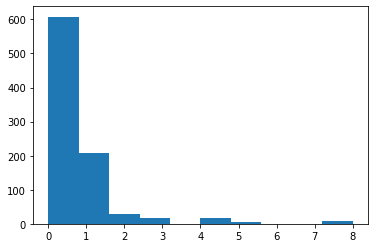

In [38]:
plt.hist(train_data.SibSp)

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

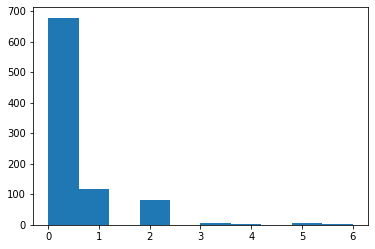

In [39]:
plt.hist(train_data.Parch)

시각화 하여 데이터를 확인해보니 범주형으로 나눠도 상관없겠지만, 7가지의 범주로 나누는 것 보다 연속형으로 두는 것이 더 괜찮을 것 같다는 생각을 했다.

## 데이터의 위에 5개의 데이터를 확인하고 범주형은 category로 타입을 변경하기로 했다.

In [32]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [34]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [40]:
train_data['Survived'] = train_data['Survived'].astype('category')
train_data['Pclass'] = train_data['Pclass'].astype('category')
train_data['Sex'] = train_data['Sex'].astype('category')
train_data['Embarked'] = train_data['Embarked'].astype('category')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [41]:
train_data.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
dtype: object

잘 변경됐는지 dtypes를 이용하여 확인하고 다음으로 학습에 관련이 없는 Column을 제거하기로 했다.

In [42]:
train_data = train_data.drop('Name', axis=1)
train_data = train_data.drop('Ticket', axis=1)

In [43]:
train_data.dtypes

PassengerId       int64
Survived       category
Pclass         category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked       category
dtype: object

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Sex          891 non-null    category
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    category
dtypes: category(4), float64(2), int64(3)
memory usage: 38.8 KB


In [44]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Name, Ticket을 제거하고 데이터를 확인한다.